# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

631

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build query URL 
query_url = f"{url}appid={weather_api_key}&units={units}&q="
print(query_url)

https://api.openweathermap.org/data/2.5/weather?appid=c478c9fc7283ac6a58b8865037bc7b36&units=Imperial&q=


In [9]:
# list
city_list = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

print("Beginning Data Retrieval")
print("-----------------------------")

count = 0
set_s = 1

#loop through the lsit of cities
for i, city in enumerate(cities):


#put in set of 50  
    count += 1
    
    if count == 51:
        count = 1 
        set_s += 1
        
        
           
        
    print(f"Processing Record {count} of Set {set_s} | {city}") 

# get data  
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        

# append null values
    except KeyError:
        print("City not found. Skipping...")
        pass
        
        
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | ushuaia
Processing Record 2 of Set 1 | xai-xai
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | airai
Processing Record 6 of Set 1 | kavaratti
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | severo-kurilsk
Processing Record 10 of Set 1 | halalo
City not found. Skipping...
Processing Record 11 of Set 1 | comodoro rivadavia
Processing Record 12 of Set 1 | beringovskiy
Processing Record 13 of Set 1 | qaanaaq
Processing Record 14 of Set 1 | lagoa
Processing Record 15 of Set 1 | nioro
Processing Record 16 of Set 1 | kamenka
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | hilo
Processing Record 19 of Set 1 | chokurdakh
Processing Record 20 of Set 1 | coihaique
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | khatanga
Processing R

Processing Record 43 of Set 4 | fuengirola
Processing Record 44 of Set 4 | eureka
Processing Record 45 of Set 4 | manyana
Processing Record 46 of Set 4 | debre tabor
Processing Record 47 of Set 4 | leninskoye
Processing Record 48 of Set 4 | kropotkin
Processing Record 49 of Set 4 | santa maria
Processing Record 50 of Set 4 | marawi
Processing Record 1 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 2 of Set 5 | maceio
Processing Record 3 of Set 5 | armacao dos buzios
City not found. Skipping...
Processing Record 4 of Set 5 | tasiilaq
Processing Record 5 of Set 5 | peniche
Processing Record 6 of Set 5 | ravar
Processing Record 7 of Set 5 | ponta do sol
Processing Record 8 of Set 5 | brae
Processing Record 9 of Set 5 | ngukurr
City not found. Skipping...
Processing Record 10 of Set 5 | ancud
Processing Record 11 of Set 5 | fukue
Processing Record 12 of Set 5 | dingle
Processing Record 13 of Set 5 | aracati
Processing Record 14 of Set 5 | sartell
Processing Record 15 

Processing Record 32 of Set 8 | faanui
Processing Record 33 of Set 8 | goma
Processing Record 34 of Set 8 | alpena
Processing Record 35 of Set 8 | soria
Processing Record 36 of Set 8 | sisimiut
Processing Record 37 of Set 8 | ewa beach
Processing Record 38 of Set 8 | parabel
Processing Record 39 of Set 8 | yerbogachen
Processing Record 40 of Set 8 | mawlaik
Processing Record 41 of Set 8 | payo
Processing Record 42 of Set 8 | pouebo
Processing Record 43 of Set 8 | bandundu
Processing Record 44 of Set 8 | lodja
Processing Record 45 of Set 8 | brainerd
Processing Record 46 of Set 8 | hambantota
Processing Record 47 of Set 8 | bambari
Processing Record 48 of Set 8 | ust-nera
Processing Record 49 of Set 8 | porto velho
Processing Record 50 of Set 8 | kashi
Processing Record 1 of Set 9 | vestmannaeyjar
Processing Record 2 of Set 9 | iquique
Processing Record 3 of Set 9 | bosaso
Processing Record 4 of Set 9 | corumba
Processing Record 5 of Set 9 | talcahuano
Processing Record 6 of Set 9 | arv

Processing Record 16 of Set 12 | arrifes
Processing Record 17 of Set 12 | saryshagan
City not found. Skipping...
Processing Record 18 of Set 12 | bloomfield
Processing Record 19 of Set 12 | muros
Processing Record 20 of Set 12 | mafra
Processing Record 21 of Set 12 | tsihombe
City not found. Skipping...
Processing Record 22 of Set 12 | ulladulla
Processing Record 23 of Set 12 | keratsinion
City not found. Skipping...
Processing Record 24 of Set 12 | bolu
Processing Record 25 of Set 12 | yeppoon
Processing Record 26 of Set 12 | bartica
Processing Record 27 of Set 12 | taubate
Processing Record 28 of Set 12 | netivot
Processing Record 29 of Set 12 | kisangani
Processing Record 30 of Set 12 | vila
Processing Record 31 of Set 12 | vao
Processing Record 32 of Set 12 | kazanskaya
Processing Record 33 of Set 12 | druzhba
Processing Record 34 of Set 12 | morgan city
Processing Record 35 of Set 12 | kieta
Processing Record 36 of Set 12 | apac
Processing Record 37 of Set 12 | bilibino
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [82]:
weather_dict = pd.DataFrame ({
                            "City": city_list,
                            "Lat": lat,
                            "Lng": lng,
                            "Max Temp": max_temp,
                            "Humidity": humidity,
                            "Cloudiness": cloudiness,
                            "Wind Speed": wind_speed,
                            "Country": country,
                            "Date": date
})

weather_dict.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,46.06,81,75,13.80,AR,1666566814
1,Xai-Xai,-25.0519,33.6442,70.45,86,8,5.59,MZ,1666566814
2,Punta Arenas,-53.1500,-70.9167,50.11,62,0,10.36,CL,1666566658
3,Tuktoyaktuk,69.4541,-133.0374,14.58,80,20,7.25,CA,1666566815
4,Airai,-8.9266,125.4092,67.24,68,95,0.38,TL,1666566815


In [83]:
weather_dict.to_csv("output_data/weather_dict.csv", index=False)


In [84]:
weather_dict.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,577.000000,577.000000,577.000000,577.000000,577.000000,577.000000,5.770000e+02
mean,18.595453,18.985195,60.134766,74.625650,62.440208,7.962582,1.666567e+09
std,32.969310,90.469118,19.327805,18.409366,38.635184,5.866962,9.071682e+01
min,-54.800000,-175.200000,-9.240000,7.000000,0.000000,0.000000,1.666566e+09
25%,-8.133300,-63.903900,48.790000,67.000000,25.000000,3.440000,1.666567e+09
50%,20.516900,22.870800,65.170000,78.000000,76.000000,6.350000,1.666567e+09
75%,45.621600,101.766700,75.610000,88.000000,100.000000,11.500000,1.666567e+09
max,77.484000,179.316700,89.620000,100.000000,100.000000,30.850000,1.666567e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [85]:
#cities over 100 humidity
humidity_over = weather_dict.loc[weather_dict["Humidity"] >= 100].count()
humidity_over

City          6
Lat           6
Lng           6
Max Temp      6
Humidity      6
Cloudiness    6
Wind Speed    6
Country       6
Date          6
dtype: int64

In [86]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_dict.drop(humidity_over, inplace=False)
clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ushuaia,-54.8000,-68.3000,46.06,81,75,13.80,AR,1666566814
1,Xai-Xai,-25.0519,33.6442,70.45,86,8,5.59,MZ,1666566814
2,Punta Arenas,-53.1500,-70.9167,50.11,62,0,10.36,CL,1666566658
3,Tuktoyaktuk,69.4541,-133.0374,14.58,80,20,7.25,CA,1666566815
4,Airai,-8.9266,125.4092,67.24,68,95,0.38,TL,1666566815


In [87]:
clean_city_data.to_csv("output_data/clean.csv", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

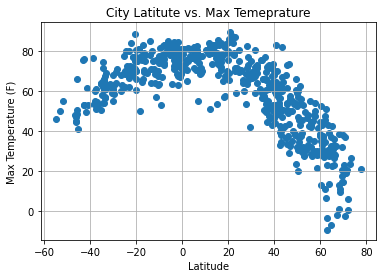

In [88]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Max Temp"]

plt.scatter(x_values,y_values)

plt.title("City Latitute vs. Max Temeprature")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.savefig("output_data/latvstemp.png")
plt.show()

## Latitude vs. Humidity Plot

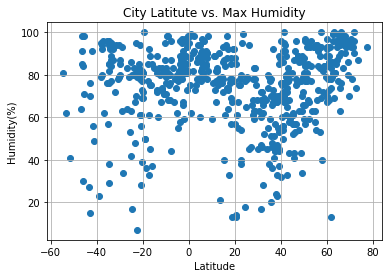

In [89]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Humidity"]

plt.scatter(x_values,y_values)

plt.title("City Latitute vs. Max Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.grid()
plt.savefig("output_data/latvshumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

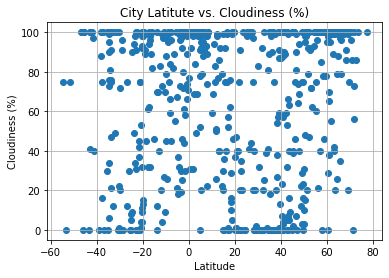

In [90]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Cloudiness"]

plt.scatter(x_values,y_values)

plt.title("City Latitute vs. Cloudiness (%)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig("output_data/latvscloudiness.png")
plt.show()

## Latitude vs. Wind Speed Plot

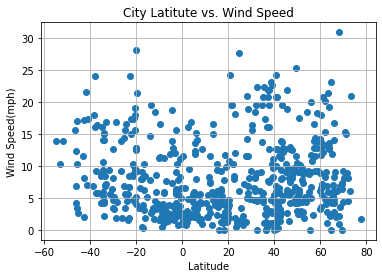

In [91]:
x_values = clean_city_data["Lat"]
y_values = clean_city_data["Wind Speed"]

plt.scatter(x_values,y_values)

plt.title("City Latitute vs. Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.grid()
plt.savefig("output_data/latvswindspeed.png")
plt.show()

## Linear Regression

In [92]:
north_hemisphere = clean_city_data.loc[clean_city_data["Lat"] > 0]
south_hemisphere = clean_city_data.loc[clean_city_data["Lat"] <= 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

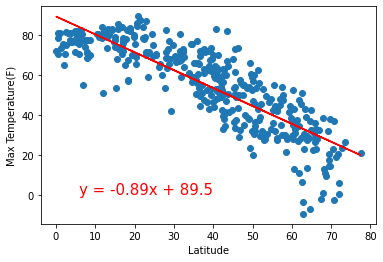

The r-value is: -0.8462769387208006


In [93]:
x_values = north_hemisphere['Lat']
y_values = north_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.savefig("output_data/latvsmaxtemp_N2.png")
plt.show()
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

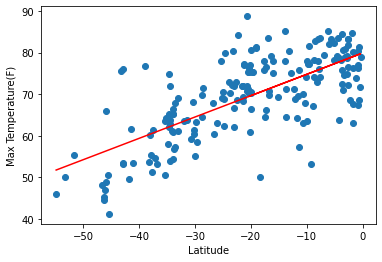

The r-value is: 0.7066486857957218


In [94]:
x_values = south_hemisphere['Lat']
y_values = south_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(F)')
plt.savefig("output_data/latvsmaxtemp_S2.png")
plt.show()
print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

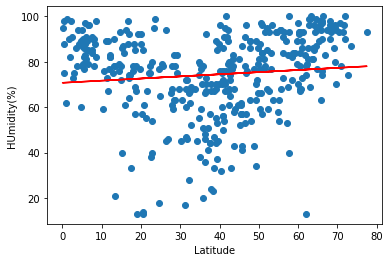

The r-value is: 0.1010779534621418


In [95]:
x_values = north_hemisphere['Lat']
y_values = north_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('HUmidity(%)')
plt.savefig("output_data/latvshumidity_N2.png")
plt.show()
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

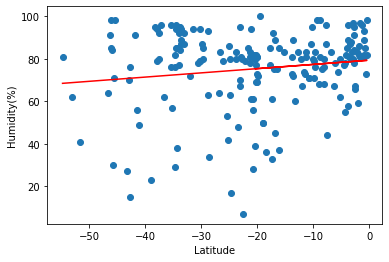

The r-value is: 0.1502391766092854


In [96]:
x_values = south_hemisphere['Lat']
y_values = south_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')
plt.savefig("output_data/latvshumidity_S2.png")
plt.show()
print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

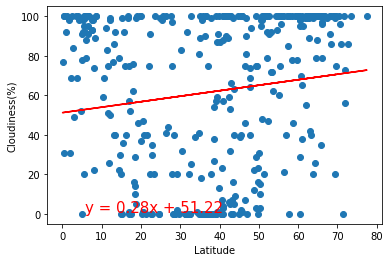

The r-value is: 0.13988501088329297


In [97]:
x_values = north_hemisphere['Lat']
y_values = north_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.savefig("output_data/latvscloudiness_N2.png")
plt.show()
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

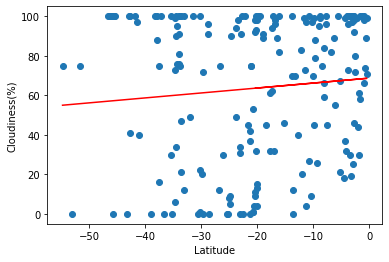

The r-value is: 0.09415916510433629


In [98]:
x_values = south_hemisphere['Lat']
y_values = south_hemisphere['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')
plt.savefig("output_data/latvscloudiness_S2.png")
plt.show()
print(f"The r-value is: {rvalue}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

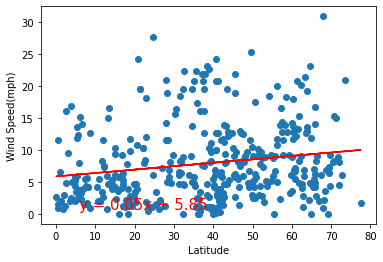

The r-value is: 0.17758801126474916


In [99]:
x_values = north_hemisphere['Lat']
y_values = north_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.savefig("output_data/latvswindspeed_N2.png")
plt.show()
print(f"The r-value is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

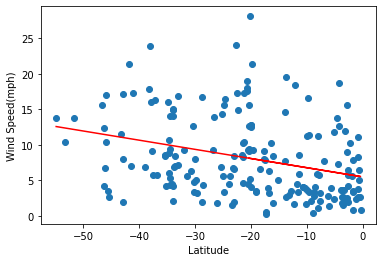

The r-value is: -0.31814439794748206


In [100]:
x_values = south_hemisphere['Lat']
y_values = south_hemisphere["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.savefig("output_data/latvswindspeed_S2.png")
plt.show()
print(f"The r-value is: {rvalue}")